In [1]:
from base64 import b64encode
import copy
from datetime import datetime
import getopt
import io
from io import BytesIO
import os
import sys

# standard numeric/scientific libraries
import numpy as np
import pandas as pd
import scipy as sp
import scipy.signal as sps
import scipy.fftpack as fftpack 

# plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('figure', figsize=(20, 12))

# image display
from PIL import Image
import IPython.display 
from IPython.display import HTML

#internal libraries which may or may not get used
import fdls

from lddutils import *
import lddecode_core
from lddecode_core import *

In [2]:
# Notebook-only functions go here

# Draws a uint16 image, downscaled to uint8
def draw_raw_bwimage(bm, x = 2800, y = 525, hscale = 1, vscale = 2, outsize = None):
    if y is None:
        y = len(bm) // x
        
    if outsize is None:
        outsize = (x * hscale, y * vscale)
    
    bmf = np.uint8(bm[0:x*y] / 256.0)
    print(bmf.shape)
    if x is not None:
        bms = (bmf.reshape(len(bmf)//x, -1))
    else:
        bms = bmf
    
    print(bms.dtype, bms.shape, bms[:][0:y].shape)
    im = Image.fromarray(bms[0:y])
    im = im.resize(outsize)
    b = BytesIO()
    im.save(b, format='png')
    return IPython.display.Image(b.getvalue())



In [5]:
filename = '/mnt3/lk-80hits_19single.lds'
outname = 'test'
firstframe = 9000
num_frames = 150

In [6]:
rfn = RFDecode(system='NTSC')

bytes_per_frame = int(rfn.freq_hz / rfn.SysParams['FPS']) + 1

fd = open(filename, 'rb')
lddecode_core.loader = load_packed_data_4_40

nextsample = firstframe * bytes_per_frame

outfile = open(outname + '.tbc', 'wb')
outfile_audio = open(outname + '.pcm', 'wb')

framer_ntsc = Framer(rfn)
ca = []
for f in range(0, num_frames):
    combined, audio, nextsample = framer_ntsc.readframe(fd, nextsample, f == 0)
    
    print('frame ', framer_ntsc.vbi['framenr'])
    
    ca.append(audio)
    
    outfile.write(combined)
    print(len(audio)//2)
    outfile_audio.write(audio)

#draw_raw_bwimage(combined, outwidth, 610, hscale=2, vscale=2)

outfile.close()
outfile_audio.close()

starting at  12012003000
too short
status code 9152569
True None
starting at  12013055598
False None
frame  7511
1603
starting at  12013724341
status code 9152569
True None
starting at  12014390255
False None
frame  7512
1601
starting at  12015059003
status code 9152569
True None
starting at  12015724949
False None
frame  7513
1601
starting at  12016393641
status code 9152569
True None
starting at  12017059674
False None
frame  7514
1603
starting at  12017728246
status code 9152569
True None
starting at  12018394401
False None
frame  7515
1601
starting at  12019062875
status code 9152569
True None
starting at  12019729086
False None
frame  7516
1601
starting at  12020397548
status code 9152569
True None
starting at  12021063739
False None
frame  7517
1603
starting at  12021732254
status code 9152569
True None
starting at  12022398362
False None
frame  7518
1601
starting at  12023066981
status code 9152569
True None
starting at  12023732970
False None
frame  7519
1601
starting at  12024

status code 9152569
True None
starting at  12114490632
False None
frame  7587
1603
starting at  12115159195
status code 9152569
True None
starting at  12115825365
False None
frame  7588
1601
starting at  12116493829
status code 9152569
True None
starting at  12117160042
False None
frame  7589
1601
starting at  12117828511
status code 9152569
True None
starting at  12118494695
False None
frame  7590
1602
starting at  12119163226
status code 9152569
True None
starting at  12119829312
False None
frame  7591
1601
starting at  12120497946
status code 9152569
True None
starting at  12121163922
False None
frame  7592
1601
starting at  12121832666
status code 9152569
True None
starting at  12122498578
False None
frame  7593
1602
starting at  12123167327
status code 9152569
True None
starting at  12123833277
False None
frame  7594
1601
starting at  12124501966
status code 9152569
True None
starting at  12125167998
False None
frame  7595
1601
starting at  12125836572
status code 9152569
True Non

(426220,)
uint8 (505, 844) (505, 844)


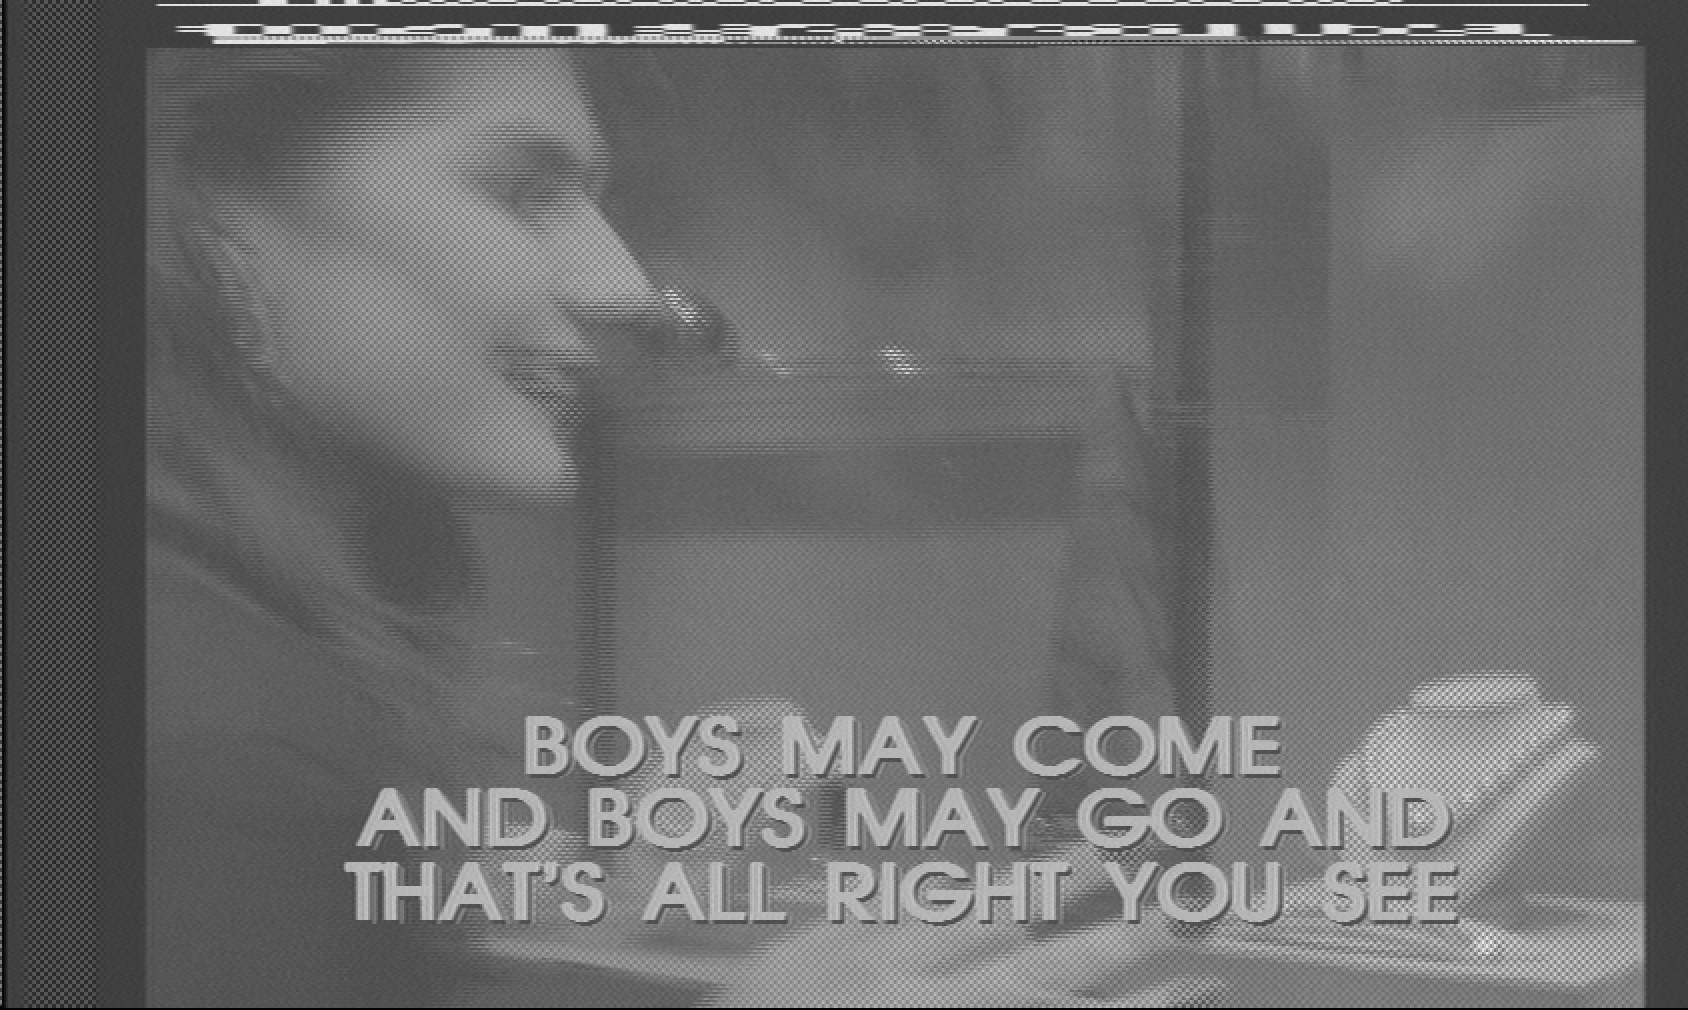

In [5]:
draw_raw_bwimage(combined, 844, 505, hscale=2, vscale=2)